In [30]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [31]:
import yfinance as yf
yf.pdr_override()

In [ ]:
df = yf.download('BTC-USD', start='2014-01-01', end='2022-01-10', threads=False)     # or threads=True
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
2022-01-06,43565.511719,43748.718750,42645.539062,43160.929688,43160.929688,30208048289
2022-01-07,43153.570312,43153.570312,41077.445312,41557.902344,41557.902344,84196607520


In [101]:
df.index.tolist()

[Timestamp('2014-09-17 00:00:00'),
 Timestamp('2014-09-18 00:00:00'),
 Timestamp('2014-09-19 00:00:00'),
 Timestamp('2014-09-20 00:00:00'),
 Timestamp('2014-09-21 00:00:00'),
 Timestamp('2014-09-22 00:00:00'),
 Timestamp('2014-09-23 00:00:00'),
 Timestamp('2014-09-24 00:00:00'),
 Timestamp('2014-09-25 00:00:00'),
 Timestamp('2014-09-26 00:00:00'),
 Timestamp('2014-09-27 00:00:00'),
 Timestamp('2014-09-28 00:00:00'),
 Timestamp('2014-09-29 00:00:00'),
 Timestamp('2014-09-30 00:00:00'),
 Timestamp('2014-10-01 00:00:00'),
 Timestamp('2014-10-02 00:00:00'),
 Timestamp('2014-10-03 00:00:00'),
 Timestamp('2014-10-04 00:00:00'),
 Timestamp('2014-10-05 00:00:00'),
 Timestamp('2014-10-06 00:00:00'),
 Timestamp('2014-10-07 00:00:00'),
 Timestamp('2014-10-08 00:00:00'),
 Timestamp('2014-10-09 00:00:00'),
 Timestamp('2014-10-10 00:00:00'),
 Timestamp('2014-10-11 00:00:00'),
 Timestamp('2014-10-12 00:00:00'),
 Timestamp('2014-10-13 00:00:00'),
 Timestamp('2014-10-14 00:00:00'),
 Timestamp('2014-10-

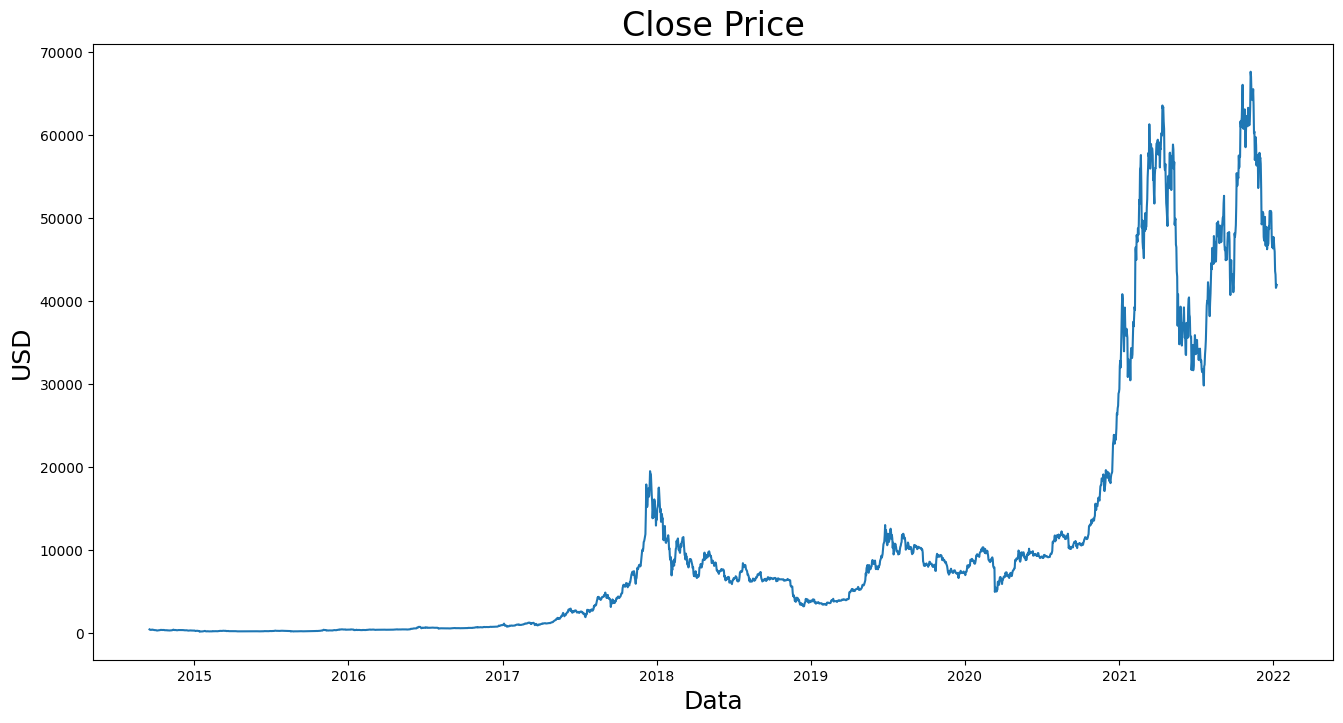

In [32]:
plt.figure(figsize=(16,8))
plt.title('Close Price', fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.show()

In [33]:
dataset = df.filter(['Close']).values
training_data_len = math.ceil(len(dataset) * .8)
print(training_data_len)

2138


In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.00414359]
 [0.00365546]
 [0.00321557]
 ...
 [0.61404633]
 [0.61665862]
 [0.61929497]]


In [35]:
train_data = scaled_data[0:training_data_len, :]
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(X_train)
    print(y_train)
    print()

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686946921404]



In [36]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # we make it like pros. it wanna say "np.reshape(X_train, (2083, 60, 1))"
print(X_train.shape)

(2078, 60, 1)


In [37]:
#Create the data sets X_test and y_test
test_data = scaled_data[training_data_len - 60 : , :]
X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [38]:
# Build LSTM model
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) , the simple form is "input_shape(60, 1)""
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss='mse')

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2078/2078 [==============================] - 73s 32ms/step - loss: 1.6582e-04
Epoch 2/10
2078/2078 [==============================] - 71s 34ms/step - loss: 8.0125e-05
Epoch 3/10
2078/2078 [==============================] - 67s 32ms/step - loss: 5.6891e-05
Epoch 4/10
2078/2078 [==============================] - 72s 35ms/step - loss: 5.2740e-05
Epoch 5/10
2078/2078 [==============================] - 70s 34ms/step - loss: 5.3469e-05
Epoch 6/10
2078/2078 [==============================] - 68s 33ms/step - loss: 4.7985e-05
Epoch 7/10
2078/2078 [==============================] - 68s 33ms/step - loss: 4.8223e-05
Epoch 8/10
2078/2078 [==============================] - 67s 32ms/step - loss: 4.2508e-05
Epoch 9/10
2078/2078 [==============================] - 69s 33ms/step - loss: 4.2156e-05
Epoch 10/10
2078/2078 [==============================] - 67s 32ms/step - loss: 4.1491e-05


In [ ]:
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

17/17 [==============================] - 4s 48ms/step


534

In [39]:
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

5875.024510987242

Text(0.5, 0, 'epochs')

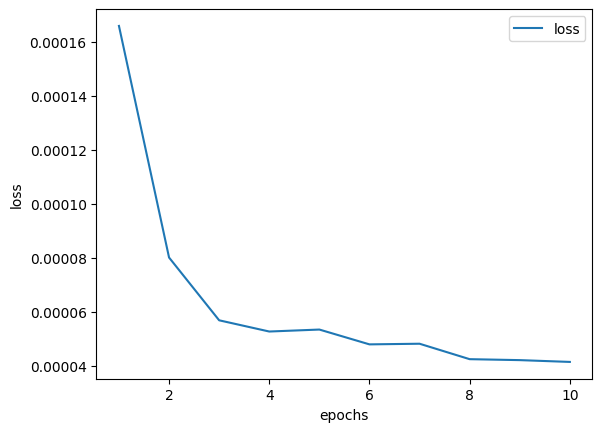

In [40]:
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [43]:
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) | the simple form is "input_shape(60, 1)
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))

model_2.compile(optimizer='Adam', loss='mse')

history_2 = model_2.fit(X_train, y_train, batch_size=1, epochs=6)

Epoch 1/6
2078/2078 [==============================] - 83s 37ms/step - loss: 1.6692e-04
Epoch 2/6
2078/2078 [==============================] - 73s 35ms/step - loss: 8.0650e-05
Epoch 3/6
2078/2078 [==============================] - 73s 35ms/step - loss: 5.7632e-05
Epoch 4/6
2078/2078 [==============================] - 74s 35ms/step - loss: 5.5648e-05
Epoch 5/6
2078/2078 [==============================] - 74s 36ms/step - loss: 5.6354e-05
Epoch 6/6
2078/2078 [==============================] - 75s 36ms/step - loss: 5.0340e-05


In [ ]:
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [42]:
X_test

array([[[0.12846288],
        [0.13359675],
        [0.13871234],
        ...,
        [0.13870659],
        [0.13953327],
        [0.13887768]],

       [[0.13359675],
        [0.13871234],
        [0.13742686],
        ...,
        [0.13953327],
        [0.13887768],
        [0.14095845]],

       [[0.13871234],
        [0.13742686],
        [0.14130422],
        ...,
        [0.13887768],
        [0.14095845],
        [0.1443426 ]],

       ...,

       [[1.        ],
        [0.99117063],
        [0.96183935],
        ...,
        [0.67844393],
        [0.64388962],
        [0.6378341 ]],

       [[0.99117063],
        [0.96183935],
        [0.96116758],
        ...,
        [0.64388962],
        [0.6378341 ],
        [0.61404633]],

       [[0.96183935],
        [0.96116758],
        [0.94938491],
        ...,
        [0.6378341 ],
        [0.61404633],
        [0.61665862]]])

In [ ]:

# Get the model_2 predicted price values
predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)

17/17 [==============================] - 1s 17ms/step


534

In [ ]:
predictions_2

array([[44762.   ],
       [44803.78 ],
       [44877.938],
       [45218.965],
       [45214.82 ],
       [45263.32 ],
       [45268.02 ],
       [45334.996],
       [45476.547],
       [45263.86 ],
       [45308.695],
       [45303.746],
       [45473.   ],
       [45492.184],
       [45432.246],
       [45474.582],
       [45454.27 ],
       [45516.586],
       [45374.7  ],
       [45420.348],
       [45488.48 ],
       [45487.203],
       [45514.934],
       [45524.035],
       [45637.   ],
       [45560.258],
       [45480.934],
       [45516.184],
       [45432.043],
       [45455.504],
       [45453.12 ],
       [45486.695],
       [45360.31 ],
       [45390.31 ],
       [45343.49 ],
       [45409.344],
       [45402.656],
       [45464.33 ],
       [45457.484],
       [45546.004],
       [45376.91 ],
       [45003.   ],
       [45068.53 ],
       [44977.723],
       [45006.637],
       [45035.816],
       [44961.37 ],
       [44988.21 ],
       [45028.32 ],
       [45042.406],


In [ ]:

# Get the root mean squared error (RMSE) for model_2
rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse_2

4234.783770043306

 1/17 [>.............................] - ETA: 1s

<ipython-input-27-689690abcc2e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1
<ipython-input-27-689690abcc2e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions'] = predictions_2


17/17 [==============================] - 1s 32ms/step


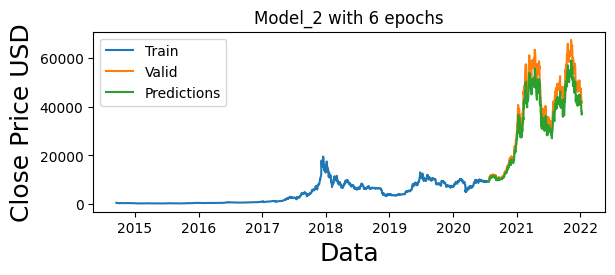

In [ ]:
# Plot the data
data = df.filter(['Close'])
train = data[:training_data_len]

#data for model_1
valid_1 = data[training_data_len:]
valid_1['Predictions'] = predictions_1

# data for model_2
valid_2 = data[training_data_len:]
valid_2['Predictions'] = predictions_2

predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)

plt.subplot(2, 1, 2)
plt.title('Model_2 with 6 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_2[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [ ]:
data = df.filter(['Close'])
last_60_days = data[-60:].values
last_60_days_scaled = scaler.fit_transform(last_60_days)
new_X_test = []
new_X_test.append(last_60_days_scaled)
new_X_test = np.array(new_X_test)
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))
pred_price = model_1.predict(new_X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 261ms/step
[[42200.61]]


In [ ]:
model_2.save("model2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
